# Car Price Prediction: Model Building and Comparison

This notebook demonstrates how to build a machine learning model to predict car prices using Linear Regression and compare its performance with other algorithms. We will use the `cardekho_dataset.csv` dataset, preprocess the data, train multiple models, evaluate their performance, and select the best model for car price prediction.

## 1. Import Required Libraries
Import libraries such as pandas, numpy, scikit-learn, and matplotlib for data handling, modeling, and visualization.

In [24]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings('ignore')

## 2. Load and Explore the Car Price Dataset
Load the car price dataset into a pandas DataFrame and perform exploratory data analysis (EDA) to understand the features and target variable.

In [25]:
# Load the car price dataset
df = pd.read_csv('cardekho_dataset.csv')

# Display the first 5 rows
df.head()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [26]:
# Basic EDA
print('Dataset Info:')
df.info()
print('\nSummary Statistics:')
display(df.describe())
print('\nMissing Values:')
display(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  object 
 7   fuel_type          15411 non-null  object 
 8   transmission_type  15411 non-null  object 
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-null  float64
 12  seats              15411 non-null  int64  
 13  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.6+ MB

Summary Statistics:


,Unnamed: 0,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,9811.857699,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,5643.418542,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4906.500000,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,9872.000000,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,14668.500000,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,19543.000000,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07



Missing Values:


Unnamed: 0           0
car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

## 3. Preprocess the Data
Handle missing values, encode categorical variables, and scale numerical features as needed for modeling.

In [27]:
# Preprocessing
# Fill missing values (if any) with median for numerics and mode for categoricals
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

# Encode categorical variables
cat_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Feature scaling (optional, for some models)
scaler = StandardScaler()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('price') if 'price' in df.columns else df.select_dtypes(include=['int64', 'float64']).columns
if 'price' in df.columns:
    df[num_cols] = scaler.fit_transform(df[num_cols])

## 4. Split Data into Training and Test Sets
Split the dataset into training and test sets using scikit-learn's train_test_split function.

In [28]:
# Split features and target
X = df.drop('selling_price', axis=1)
y = df['selling_price']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}')

Training samples: 12328, Test samples: 3083


## 5. Train a Linear Regression Model
Fit a Linear Regression model to the training data and make predictions on the test set.

In [29]:
# Train Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Evaluate
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f'Linear Regression MSE: {mse_lr:.2f}')
print(f'Linear Regression R^2: {r2_lr:.2f}')

Linear Regression MSE: 250638500325.50
Linear Regression R^2: 0.67


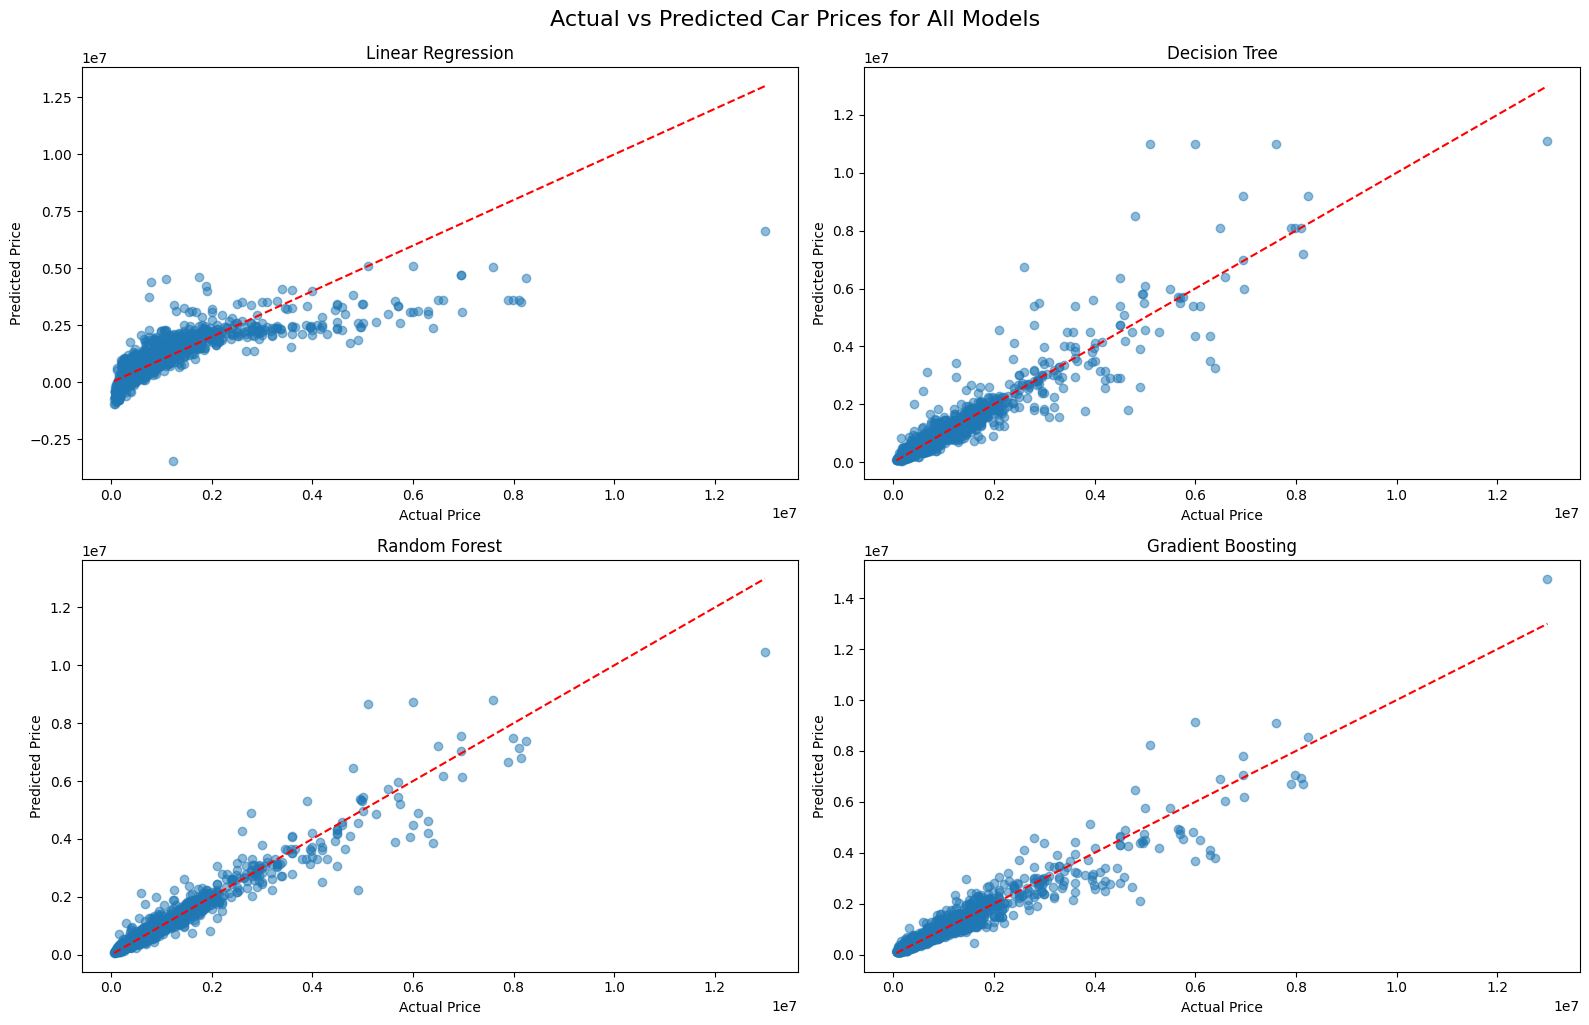

In [30]:
# Visualize actual vs predicted for all models
plt.figure(figsize=(16, 10))
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']
models_list = [lr, models['Decision Tree'], models['Random Forest'], models['Gradient Boosting']]

for i, (name, model) in enumerate(zip(model_names, models_list), 1):
    y_pred = model.predict(X_test)
    plt.subplot(2, 2, i)
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title(f'{name}')

plt.tight_layout()
plt.suptitle('Actual vs Predicted Car Prices for All Models', fontsize=16, y=1.02)
plt.show()

## 6. Train and Compare Other Regression Algorithms
Train additional regression models such as Decision Tree, Random Forest, and Gradient Boosting. Compare their performance with Linear Regression.

In [31]:
# Train and evaluate other regression models
models = {
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}
results = {'Model': [], 'MSE': [], 'R2': []}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results['Model'].append(name)
    results['MSE'].append(mse)
    results['R2'].append(r2)
    print(f'{name} MSE: {mse:.2f}, R^2: {r2:.2f}')

# Add Linear Regression results for comparison
results['Model'].insert(0, 'Linear Regression')
results['MSE'].insert(0, mse_lr)
results['R2'].insert(0, r2_lr)

results_df = pd.DataFrame(results)
results_df

Decision Tree MSE: 104195900183.47, R^2: 0.86
Random Forest MSE: 47063965936.56, R^2: 0.94
Gradient Boosting MSE: 64770617098.14, R^2: 0.91


,Model,MSE,R2
0,Linear Regression,2.506385e+11,0.667050
1,Decision Tree,1.041959e+11,0.861586
2,Random Forest,4.706397e+10,0.937480
3,Gradient Boosting,6.477062e+10,0.913958


In [32]:
# Cross-validation for all models
from sklearn.model_selection import cross_val_score

cv_results = {'Model': [], 'CV_MSE': [], 'CV_R2': []}
models_cv = {'Linear Regression': lr, **models}

for name, model in models_cv.items():
    neg_mse = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    r2 = cross_val_score(model, X, y, cv=5, scoring='r2')
    cv_results['Model'].append(name)
    cv_results['CV_MSE'].append(-neg_mse.mean())
    cv_results['CV_R2'].append(r2.mean())
    print(f'{name} | CV MSE: {-neg_mse.mean():.2f} | CV R2: {r2.mean():.2f}')

cv_results_df = pd.DataFrame(cv_results)
display(cv_results_df)

Linear Regression | CV MSE: 299934374186.11 | CV R2: 0.64
Decision Tree | CV MSE: 206932799381.81 | CV R2: 0.75
Random Forest | CV MSE: 118778534367.05 | CV R2: 0.87
Gradient Boosting | CV MSE: 121567697714.59 | CV R2: 0.86


,Model,CV_MSE,CV_R2
0,Linear Regression,2.999344e+11,0.635527
1,Decision Tree,2.069328e+11,0.746641
2,Random Forest,1.187785e+11,0.868065
3,Gradient Boosting,1.215677e+11,0.859906


## 7. Evaluate Model Performance
Evaluate all models using metrics like Mean Squared Error (MSE) and R^2 score. Visualize the results for comparison.

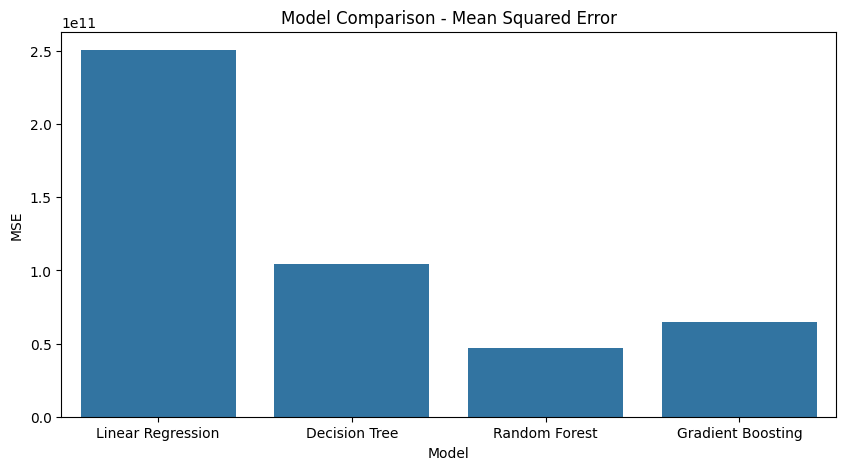

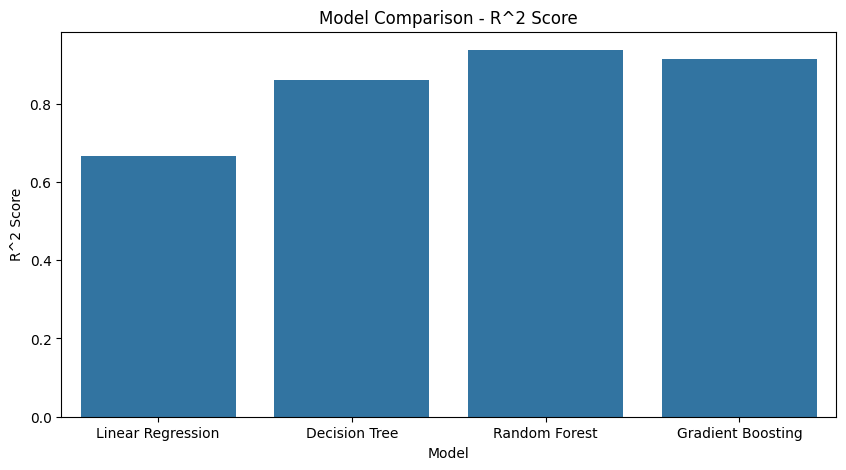

In [33]:
# Visualize model performance
plt.figure(figsize=(10,5))
sns.barplot(x='Model', y='MSE', data=results_df)
plt.title('Model Comparison - Mean Squared Error')
plt.ylabel('MSE')
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(x='Model', y='R2', data=results_df)
plt.title('Model Comparison - R^2 Score')
plt.ylabel('R^2 Score')
plt.show()

## 8. Select and Retrain the Best Model
Identify the best-performing model based on evaluation metrics and retrain it on the full training data.

In [34]:
# Select the best model (lowest MSE)
best_idx = results_df['MSE'].idxmin()
best_model_name = results_df.loc[best_idx, 'Model']
print(f'Best Model: {best_model_name}')

# Retrain the best model on the full training data
if best_model_name == 'Linear Regression':
    best_model = LinearRegression()
elif best_model_name == 'Decision Tree':
    best_model = DecisionTreeRegressor(random_state=42)
elif best_model_name == 'Random Forest':
    best_model = RandomForestRegressor(random_state=42)
elif best_model_name == 'Gradient Boosting':
    best_model = GradientBoostingRegressor(random_state=42)
else:
    raise ValueError('Unknown model')

best_model.fit(X_train, y_train)

Best Model: Random Forest


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## 9. Predict Car Prices with the Best Model
Use the best model to predict car prices on new or test data and display the results.

,Actual,Predicted
3334,190000,232880.0
10928,600000,607420.0
2518,665000,622420.0
11322,1570000,1248000.0
9394,160000,152550.0
13649,675000,447190.0
11892,465000,452750.0
5133,260000,303870.0
1611,300000,336860.0
8137,850000,1333010.0


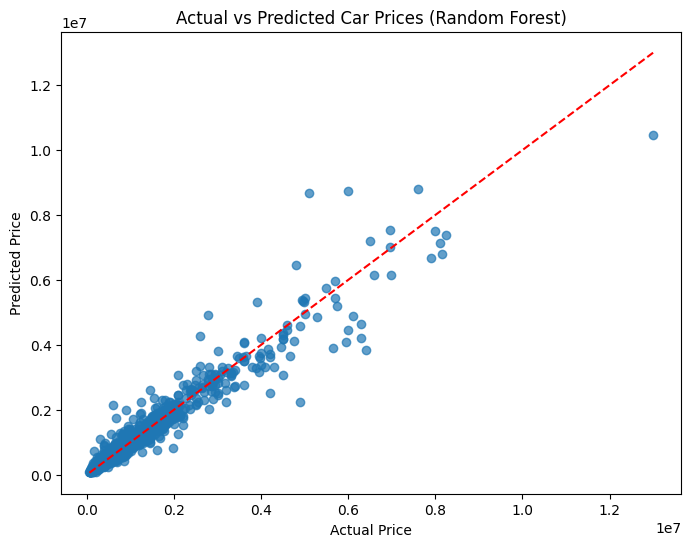

In [35]:
# Predict car prices on the test set with the best model
y_pred_best = best_model.predict(X_test)

# Display actual vs predicted prices
results_compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_best})
display(results_compare.head(10))

# Plot actual vs predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_best, alpha=0.7)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title(f'Actual vs Predicted Car Prices ({best_model_name})')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

In [ ]:
# Detailed Data Analysis
print('First 5 rows:')
display(df.head())

print('\nData Info:')
df.info()

print('\nSummary Statistics:')
display(df.describe())

print('\nMissing Values:')
display(df.isnull().sum())

# Value counts for categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    print(f'\nValue counts for {col}:')
    print(df[col].value_counts())

# Pairplot for numeric features (sampled for speed)
sns.pairplot(df.sample(500), diag_kind='kde')
plt.show()

## Predicting Car Mileage
Now we will build and evaluate machine learning models to predict the car's mileage based on other features in the dataset.

In [ ]:
# Prepare data for mileage prediction
features = df.drop(['mileage', 'selling_price', 'car_name'], axis=1)
target = df['mileage']

# Split into train and test sets
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
rf_mileage = RandomForestRegressor(random_state=42)
rf_mileage.fit(X_train_m, y_train_m)
y_pred_m = rf_mileage.predict(X_test_m)

# Evaluate
mse_m = mean_squared_error(y_test_m, y_pred_m)
r2_m = r2_score(y_test_m, y_pred_m)
print(f'Random Forest Mileage Prediction MSE: {mse_m:.2f}')
print(f'Random Forest Mileage Prediction R^2: {r2_m:.2f}')